#Project Scope:
Analyzed 5.8M+ U.S. domestic flights to compare airline efficiency, airport operations, and build a delay prediction model.

#Setup

In [3]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#Loading Dataset

In [2]:
# Load data
airlines = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Airline Comparison Analysis/airlines.csv')
airports = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Airline Comparison Analysis/airports.csv')
flights = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Airline Comparison Analysis/flights.csv')

<ipython-input-2-663439b79c2c>:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Airline Comparison Analysis/flights.csv')


In [4]:
# First, let's examine the data structure
print("Column names in each DataFrame:")
print("Airlines:", airlines.columns.tolist())
print("Airports:", airports.columns.tolist())
print("Flights:", flights.columns.tolist())

Column names in each DataFrame:
Airlines: ['IATA_CODE', 'AIRLINE']
Airports: ['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE']
Flights: ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']


In [5]:
airports.describe()
airlines.describe()
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


#Merge airline names

In [6]:
# Rename airline columns to avoid collision
airlines.columns = ['AIRLINE_CODE', 'AIRLINE_NAME']

# Merge airline name into flights
flights = flights.merge(airlines, how='left', left_on='AIRLINE', right_on='AIRLINE_CODE')
flights.drop('AIRLINE_CODE', axis=1, inplace=True)

print(flights.head())

   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_DELAY  \
0            ANC                 SEA                    5  ...          -22.0   
1            LAX                 PBI                   10  ...           -9.0   
2            SFO                 CLT                   20  ...            5.0   
3            LAX                 MIA                   20  ...           -9.0   
4            SEA                 ANC                   25  ...          -21.0   

   DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
0    

#Merge origin airport info

In [7]:
# Select and rename relevant airport info
origin_info = airports[['IATA_CODE', 'AIRPORT', 'CITY', 'STATE']]
origin_info.columns = ['ORIGIN_AIRPORT', 'ORIGIN_AIRPORT_NAME', 'ORIGIN_CITY', 'ORIGIN_STATE']

# Merge into flights
flights = flights.merge(origin_info, how='left', on='ORIGIN_AIRPORT')


#Merge destination airport info

In [8]:
# Select and rename for destination airport
dest_info = airports[['IATA_CODE', 'AIRPORT', 'CITY', 'STATE']]
dest_info.columns = ['DESTINATION_AIRPORT', 'DEST_AIRPORT_NAME', 'DEST_CITY', 'DEST_STATE']

# Merge into flights
flights = flights.merge(dest_info, how='left', on='DESTINATION_AIRPORT')


In [9]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,ORIGIN_AIRPORT_NAME,ORIGIN_CITY,ORIGIN_STATE,DEST_AIRPORT_NAME,DEST_CITY,DEST_STATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,NaN,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,Seattle-Tacoma International Airport,Seattle,WA
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,NaN,NaN,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,Palm Beach International Airport,West Palm Beach,FL
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,NaN,NaN,NaN,US Airways Inc.,San Francisco International Airport,San Francisco,CA,Charlotte Douglas International Airport,Charlotte,NC
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,NaN,NaN,NaN,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,Miami International Airport,Miami,FL
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,NaN,NaN,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Seattle,WA,Ted Stevens Anchorage International Airport,Anchorage,AK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,NaN,NaN,NaN,JetBlue Airways,Los Angeles International Airport,Los Angeles,CA,Gen. Edward Lawrence Logan International Airport,Boston,MA
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,NaN,NaN,NaN,JetBlue Airways,John F. Kennedy International Airport (New Yor...,New York,NY,Mercedita Airport,Ponce,PR
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,NaN,NaN,NaN,JetBlue Airways,John F. Kennedy International Airport (New Yor...,New York,NY,Luis Muñoz Marín International Airport,San Juan,PR
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,NaN,NaN,NaN,JetBlue Airways,Orlando International Airport,Orlando,FL,Luis Muñoz Marín International Airport,San Juan,PR


#Convert delay columns to numeric (handle nulls)

In [10]:
delay_cols = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
              'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

flights[delay_cols] = flights[delay_cols].apply(pd.to_numeric, errors='coerce')
# Create helper columns
flights['DEPARTURE_HOUR'] = (flights['SCHEDULED_DEPARTURE'] // 100).astype(int)
flights['ROUTE'] = flights['ORIGIN_CITY'] + " ➡️ " + flights['DEST_CITY']


In [11]:
print("Preview of enriched flight data:")
flights[['AIRLINE', 'AIRLINE_NAME', 'ORIGIN_CITY', 'DEST_CITY', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']].head()

Preview of enriched flight data:


,AIRLINE,AIRLINE_NAME,ORIGIN_CITY,DEST_CITY,DEPARTURE_DELAY,ARRIVAL_DELAY
0,AS,Alaska Airlines Inc.,Anchorage,Seattle,-11.0,-22.0
1,AA,American Airlines Inc.,Los Angeles,West Palm Beach,-8.0,-9.0
2,US,US Airways Inc.,San Francisco,Charlotte,-2.0,5.0
3,AA,American Airlines Inc.,Los Angeles,Miami,-5.0,-9.0
4,AS,Alaska Airlines Inc.,Seattle,Anchorage,-1.0,-21.0


#Check total missing values by column

In [12]:
# Total missing values per column
missing_values = flights.isnull().sum().sort_values(ascending=False)

# Display only columns with missing values
missing_values = missing_values[missing_values > 0]
missing_values


,0
CANCELLATION_REASON,5729195
SECURITY_DELAY,4755640
WEATHER_DELAY,4755640
LATE_AIRCRAFT_DELAY,4755640
AIRLINE_DELAY,4755640
AIR_SYSTEM_DELAY,4755640
ORIGIN_CITY,486165
ORIGIN_AIRPORT_NAME,486165
DEST_AIRPORT_NAME,486165
ORIGIN_STATE,486165


In [13]:
def clean_flights_dataset(df):
    df = df.copy()

    # Drop rows missing key delay info
    df = df.dropna(subset=['ARRIVAL_DELAY', 'DEPARTURE_DELAY'])

    # Fill delay causes with 0
    delay_cols = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
                  'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
    df[delay_cols] = df[delay_cols].fillna(0)

    # Fill tail numbers if missing
    df['TAIL_NUMBER'] = df['TAIL_NUMBER'].fillna('UNKNOWN')

    return df


In [14]:
flights_cleaned = clean_flights_dataset(flights)


In [15]:
print(f"Original rows: {len(flights)}")
print(f"Cleaned rows: {len(flights_cleaned)}")
print(f"Rows dropped: {len(flights) - len(flights_cleaned)}")


Original rows: 5819079
Cleaned rows: 5714008
Rows dropped: 105071


#Analysis Charts

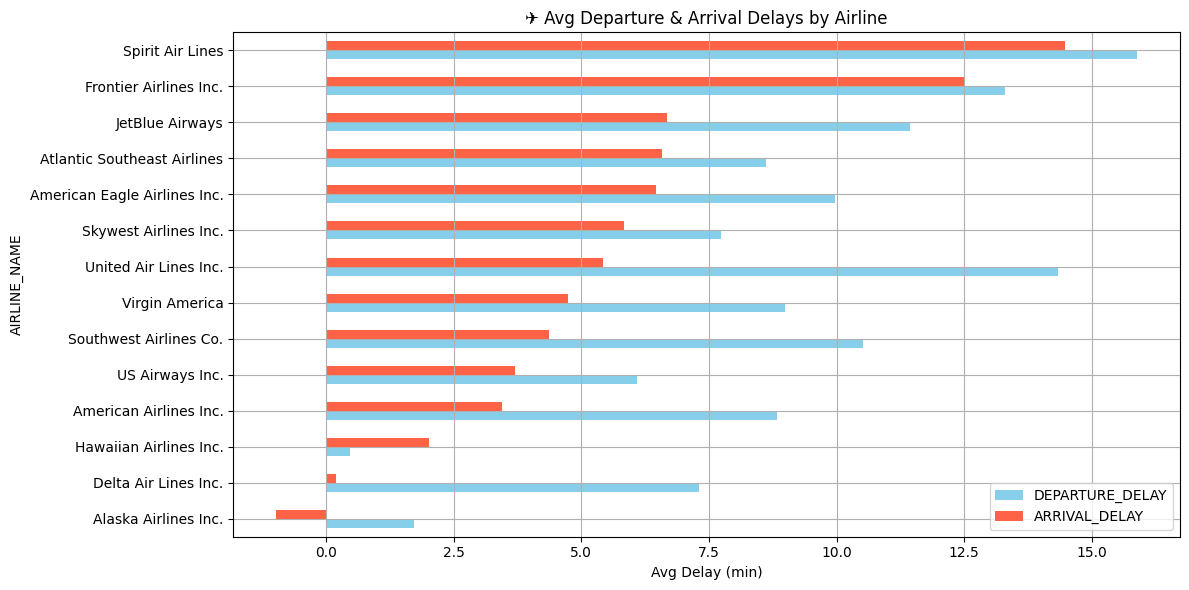

In [16]:
# Chart 1: Average Delay by Airline
airline_delay_summary = flights_cleaned.groupby('AIRLINE_NAME')[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].mean()
airline_delay_summary.sort_values('ARRIVAL_DELAY').plot(kind='barh', figsize=(12, 6), color=['skyblue', 'tomato'])
plt.title('✈️ Avg Departure & Arrival Delays by Airline')
plt.xlabel('Avg Delay (min)')
plt.grid(True)
plt.tight_layout()
plt.show()


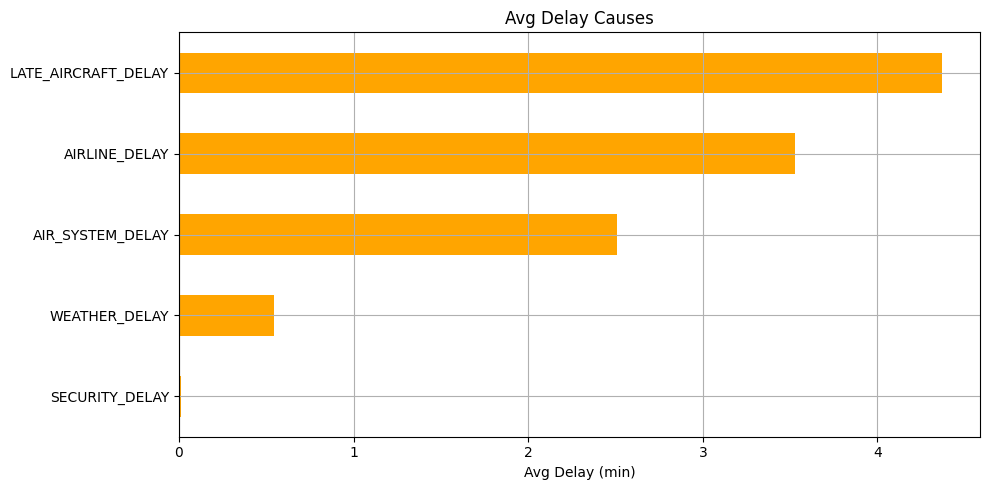

In [22]:
# Chart 2: Delay Cause Analysis
cause_means = flights_cleaned[delay_cols[2:]].mean().sort_values()
cause_means.plot(kind='barh', figsize=(10, 5), color='orange')
plt.title('Avg Delay Causes')
plt.xlabel('Avg Delay (min)')
plt.grid(True)
plt.tight_layout()
plt.show()


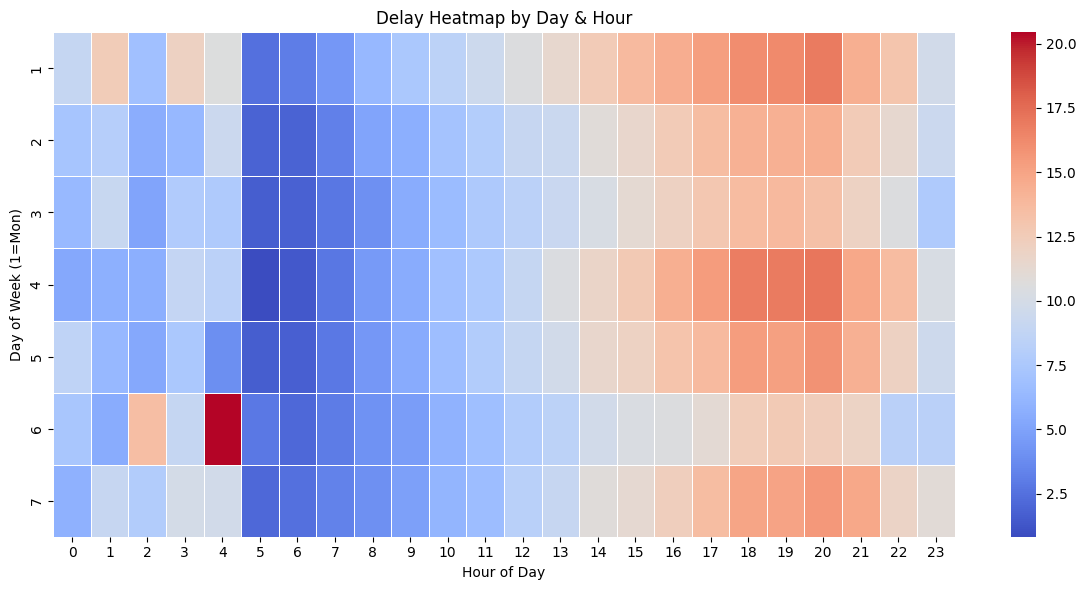

In [21]:
# Chart 3: Heatmap of Delays by Day and Hour
heatmap_data = flights_cleaned.groupby(['DAY_OF_WEEK', 'DEPARTURE_HOUR'])['DEPARTURE_DELAY'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.title('Delay Heatmap by Day & Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (1=Mon)')
plt.tight_layout()
plt.show()


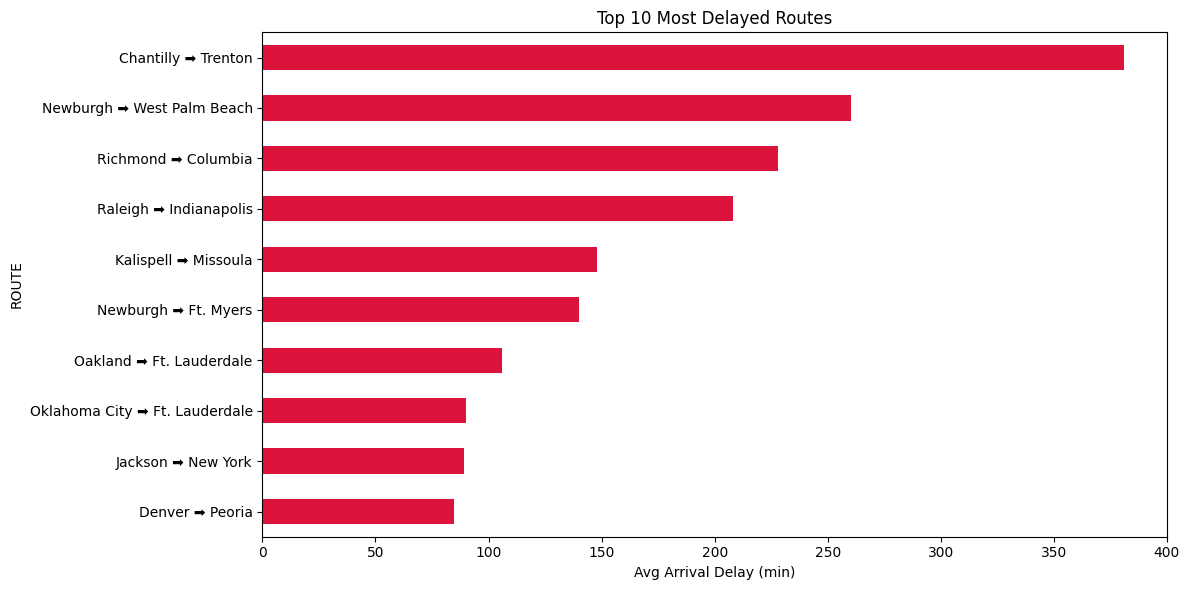

In [20]:
# Chart 4: Top 10 Most Delayed Routes
route_delays = flights_cleaned.groupby('ROUTE')['ARRIVAL_DELAY'].mean().sort_values(ascending=False).head(10)
route_delays.plot(kind='barh', figsize=(12, 6), color='crimson')
plt.title('Top 10 Most Delayed Routes')
plt.xlabel('Avg Arrival Delay (min)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


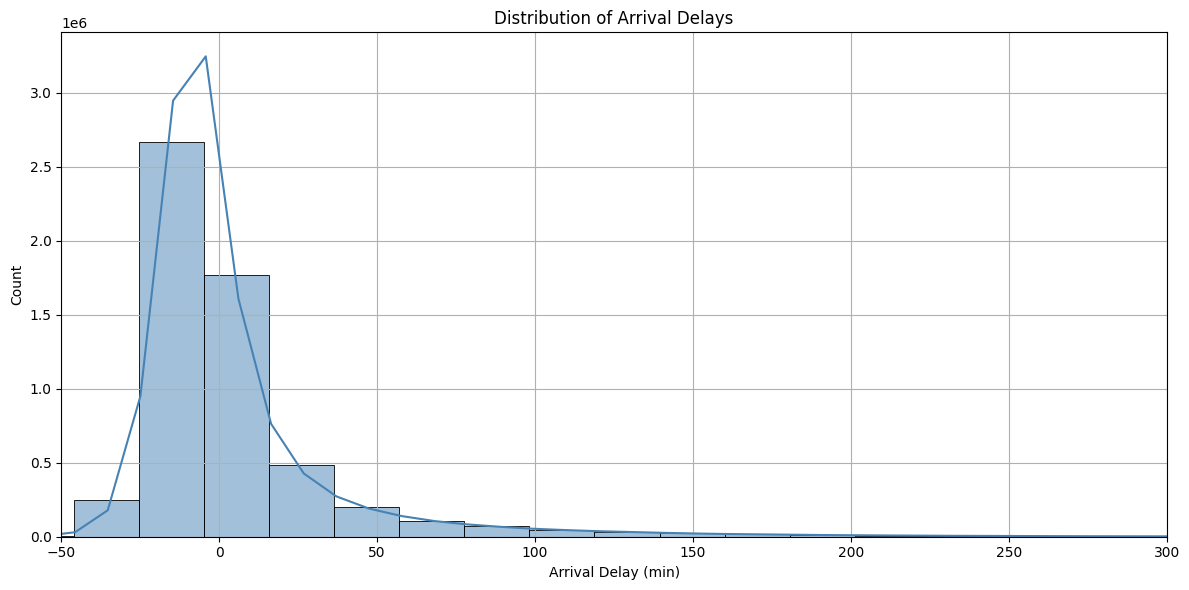

In [28]:
# Chart 5: Arrival Delay Distribution
plt.figure(figsize=(12, 6))
sns.histplot(flights_cleaned['ARRIVAL_DELAY'], bins=100, color='steelblue', kde=True)
plt.xlim(-50, 300)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (min)')
plt.grid(True)
plt.tight_layout()
plt.show()


#AIRLINE PERFORMANCE SUMMARY TABLE

In [29]:
airline_perf = flights_cleaned.groupby('AIRLINE_NAME').agg({
    'DEPARTURE_DELAY': 'mean',
    'ARRIVAL_DELAY': 'mean',
    'CANCELLED': 'mean',
    'DIVERTED': 'mean',
    'DISTANCE': 'mean',
    'FLIGHT_NUMBER': 'count'
}).rename(columns={
    'CANCELLED': 'CANCEL_RATE',
    'DIVERTED': 'DIVERT_RATE',
    'FLIGHT_NUMBER': 'FLIGHT_COUNT'
}).sort_values('ARRIVAL_DELAY')

display(airline_perf)


,DEPARTURE_DELAY,ARRIVAL_DELAY,CANCEL_RATE,DIVERT_RATE,DISTANCE,FLIGHT_COUNT
AIRLINE_NAME,,,,,,
Alaska Airlines Inc.,1.718926,-0.976563,0.0,0.0,1198.685369,171439
Delta Air Lines Inc.,7.313300,0.186754,0.0,0.0,853.596981,870275
Hawaiian Airlines Inc.,0.469918,2.023093,0.0,0.0,632.027025,76041
American Airlines Inc.,8.826106,3.451372,0.0,0.0,1042.372584,712935
US Airways Inc.,6.081000,3.706209,0.0,0.0,915.380259,194223
Southwest Airlines Co.,10.517183,4.374964,0.0,0.0,741.754653,1242403
Virgin America,8.993486,4.737706,0.0,0.0,1404.377531,61248
United Air Lines Inc.,14.333056,5.431594,0.0,0.0,1271.683948,507762
Skywest Airlines Inc.,7.736083,5.845652,0.0,0.0,497.727302,576814


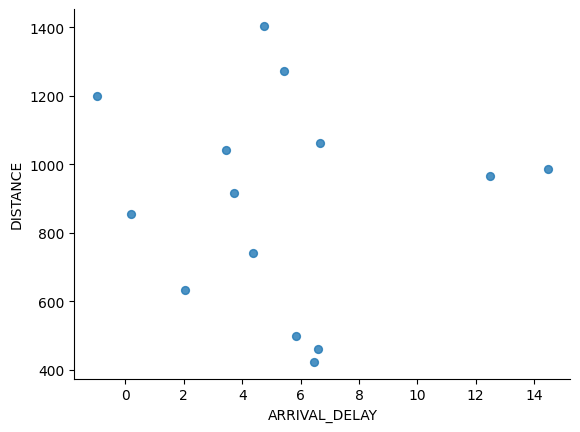

In [32]:
# @title ARRIVAL_DELAY vs DISTANCE

from matplotlib import pyplot as plt
airline_perf.plot(kind='scatter', x='ARRIVAL_DELAY', y='DISTANCE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

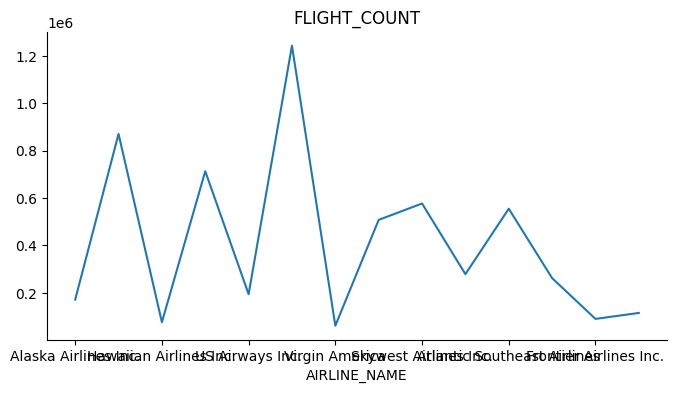

In [31]:
# @title FLIGHT_COUNT

from matplotlib import pyplot as plt
airline_perf['FLIGHT_COUNT'].plot(kind='line', figsize=(8, 4), title='FLIGHT_COUNT')
plt.gca().spines[['top', 'right']].set_visible(False)

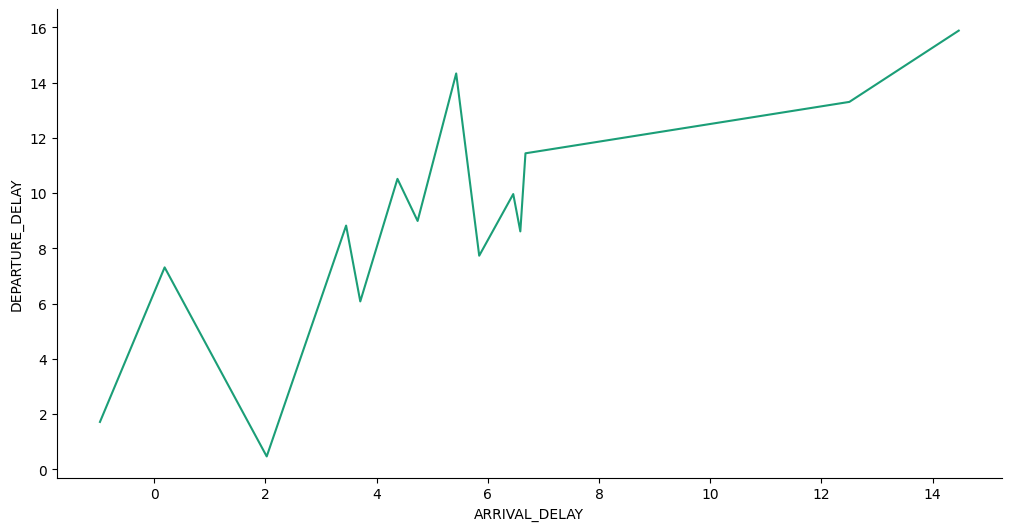

In [30]:
# @title ARRIVAL_DELAY vs DEPARTURE_DELAY

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ARRIVAL_DELAY']
  ys = series['DEPARTURE_DELAY']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = airline_perf.sort_values('ARRIVAL_DELAY', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ARRIVAL_DELAY')
_ = plt.ylabel('DEPARTURE_DELAY')

#Performance
 **Which airlines have the lowest average delays?**

In [33]:
print("🚀 Airlines with the lowest average ARRIVAL delays:")
print(airline_perf[['ARRIVAL_DELAY']].sort_values(by='ARRIVAL_DELAY').head(5))

🚀 Airlines with the lowest average ARRIVAL delays:
                        ARRIVAL_DELAY
AIRLINE_NAME                         
Alaska Airlines Inc.        -0.976563
Delta Air Lines Inc.         0.186754
Hawaiian Airlines Inc.       2.023093
American Airlines Inc.       3.451372
US Airways Inc.              3.706209


**What time patterns (hour/day/month) influence performance?**

In [34]:
print("📊 Average delay by DEPARTURE_HOUR:")
print(flights_cleaned.groupby('DEPARTURE_HOUR')['DEPARTURE_DELAY'].mean().round(2).sort_values())

print("\n📆 Average delay by DAY_OF_WEEK:")
print(flights_cleaned.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean().round(2).sort_values())

print("\n🗓️ Average delay by MONTH:")
print(flights_cleaned.groupby('MONTH')['DEPARTURE_DELAY'].mean().round(2).sort_values())


📊 Average delay by DEPARTURE_HOUR:
DEPARTURE_HOUR
5      1.85
6      2.04
7      3.21
8      4.64
9      5.63
10     6.82
0      7.15
2      7.26
11     7.70
1      8.05
12     8.86
3      8.92
23     9.47
13     9.71
4     10.32
14    11.10
22    11.73
15    11.85
16    12.84
21    13.64
17    13.75
18    14.89
19    14.99
20    15.20
Name: DEPARTURE_DELAY, dtype: float64

📆 Average delay by DAY_OF_WEEK:
DAY_OF_WEEK
6     7.73
3     8.60
2     9.10
7     9.33
5     9.37
4     9.88
1    10.76
Name: DEPARTURE_DELAY, dtype: float64

🗓️ Average delay by MONTH:
MONTH
9      4.80
10     4.94
11     6.89
4      7.63
5      9.36
3      9.58
1      9.69
8      9.87
7     11.35
12    11.69
2     11.78
6     13.87
Name: DEPARTURE_DELAY, dtype: float64


#RELIABILITY
**What percentage of flights are cancelled or diverted per airline?**

In [35]:
print("📉 Cancelled & Diverted flight % per airline:")
print(airline_perf[['CANCEL_RATE', 'DIVERT_RATE']].sort_values(by='CANCEL_RATE', ascending=False).head(5))

📉 Cancelled & Diverted flight % per airline:
                        CANCEL_RATE  DIVERT_RATE
AIRLINE_NAME                                    
Alaska Airlines Inc.            0.0          0.0
Delta Air Lines Inc.            0.0          0.0
Hawaiian Airlines Inc.          0.0          0.0
American Airlines Inc.          0.0          0.0
US Airways Inc.                 0.0          0.0


**What are the main causes of delays?**

In [36]:
print("⚠️ Mean delay time by cause (minutes):")
print(flights_cleaned[delay_cols[2:]].mean().round(2).sort_values(ascending=False))

⚠️ Mean delay time by cause (minutes):
LATE_AIRCRAFT_DELAY    4.37
AIRLINE_DELAY          3.53
AIR_SYSTEM_DELAY       2.51
WEATHER_DELAY          0.54
SECURITY_DELAY         0.01
dtype: float64


# ROUTE-SPECIFIC INSIGHTS
**Which routes are the most delay-prone?**

In [37]:
print("✈️ Top 5 most delayed routes (by arrival delay):")
print(route_delays.sort_values(ascending=False).head(5))

✈️ Top 5 most delayed routes (by arrival delay):
ROUTE
Chantilly ➡️ Trenton           381.0
Newburgh ➡️ West Palm Beach    260.5
Richmond ➡️ Columbia           228.0
Raleigh ➡️ Indianapolis        208.0
Kalispell ➡️ Missoula          148.0
Name: ARRIVAL_DELAY, dtype: float64


**Are some airports more problematic than others?**

In [38]:
print("🛬 Avg arrival delay by origin airport (top 10 worst):")
print(flights_cleaned.groupby('ORIGIN_AIRPORT_NAME')['ARRIVAL_DELAY'].mean().sort_values(ascending=False).head(10))

print("\n🛫 Avg arrival delay by destination airport (top 10 worst):")
print(flights_cleaned.groupby('DEST_AIRPORT_NAME')['ARRIVAL_DELAY'].mean().sort_values(ascending=False).head(10))

🛬 Avg arrival delay by origin airport (top 10 worst):
ORIGIN_AIRPORT_NAME
Wilmington Airport                                          24.063158
Gustavus Airport                                            21.763158
Pago Pago International Airport (Tafuna Airport)            21.500000
St. Cloud Regional Airport                                  19.558442
Jack Brooks Regional Airport (Southeast Texas Regional)     16.154696
Aspen-Pitkin County Airport                                 15.492492
Southwest Oregon Regional Airport (North Bend Municipal)    14.333333
Martha's Vineyard Airport                                   12.980488
Eagle County Regional Airport                               12.401503
Trenton Mercer Airport                                      11.990256
Name: ARRIVAL_DELAY, dtype: float64

🛫 Avg arrival delay by destination airport (top 10 worst):
DEST_AIRPORT_NAME
St. Cloud Regional Airport                                  23.025974
Wilmington Airport                        

#OPERATIONAL IMPACT
**How does flight distance, time of day, or airport affect delays?**

In [39]:
print("📏 Correlation between delay and distance:")
print(flights_cleaned[['DISTANCE', 'ARRIVAL_DELAY']].corr())

print("\n🕒 Avg arrival delay by departure hour:")
print(flights_cleaned.groupby('DEPARTURE_HOUR')['ARRIVAL_DELAY'].mean().round(2))

📏 Correlation between delay and distance:
               DISTANCE  ARRIVAL_DELAY
DISTANCE       1.000000      -0.025444
ARRIVAL_DELAY -0.025444       1.000000

🕒 Avg arrival delay by departure hour:
DEPARTURE_HOUR
0      0.81
1      3.89
2      1.82
3      1.73
4      3.70
5     -3.78
6     -2.61
7     -1.50
8     -0.19
9      0.97
10     2.17
11     2.88
12     3.80
13     5.01
14     6.31
15     7.02
16     8.10
17     9.03
18     9.89
19    10.11
20     9.78
21     8.06
22     6.22
23     3.12
Name: ARRIVAL_DELAY, dtype: float64


**Can we profile airlines by efficiency or consistency?**

In [40]:
print("✅ Airline performance summary (delay, cancel, divert, flight count):")
print(airline_perf[['ARRIVAL_DELAY', 'CANCEL_RATE', 'DIVERT_RATE', 'FLIGHT_COUNT']].round(2).sort_values(by='ARRIVAL_DELAY'))

✅ Airline performance summary (delay, cancel, divert, flight count):
                              ARRIVAL_DELAY  CANCEL_RATE  DIVERT_RATE  \
AIRLINE_NAME                                                            
Alaska Airlines Inc.                  -0.98          0.0          0.0   
Delta Air Lines Inc.                   0.19          0.0          0.0   
Hawaiian Airlines Inc.                 2.02          0.0          0.0   
American Airlines Inc.                 3.45          0.0          0.0   
US Airways Inc.                        3.71          0.0          0.0   
Southwest Airlines Co.                 4.37          0.0          0.0   
Virgin America                         4.74          0.0          0.0   
United Air Lines Inc.                  5.43          0.0          0.0   
Skywest Airlines Inc.                  5.85          0.0          0.0   
American Eagle Airlines Inc.           6.46          0.0          0.0   
Atlantic Southeast Airlines            6.59          0.

#Monthly Trends in Delays

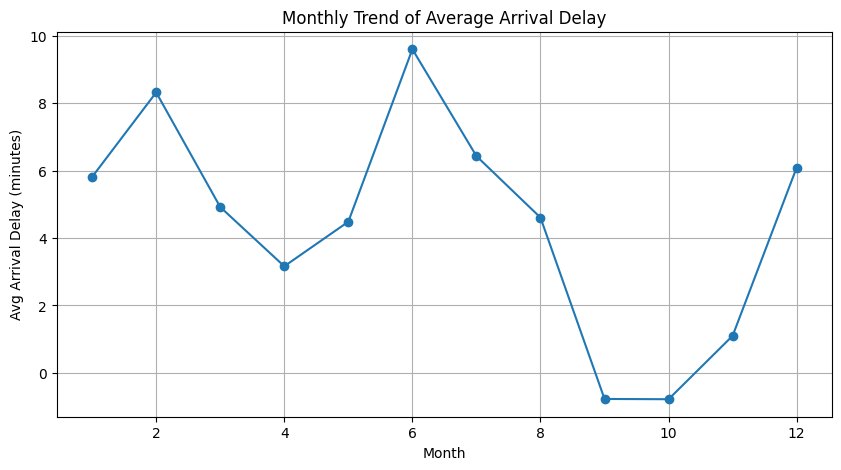

In [42]:
monthly_trend = flights_cleaned.groupby('MONTH')['ARRIVAL_DELAY'].mean()
monthly_trend.plot(marker='o', figsize=(10, 5))
plt.title('Monthly Trend of Average Arrival Delay')
plt.xlabel('Month')
plt.ylabel('Avg Arrival Delay (minutes)')
plt.grid(True)
plt.show()


#Airport Delay Leaderboard

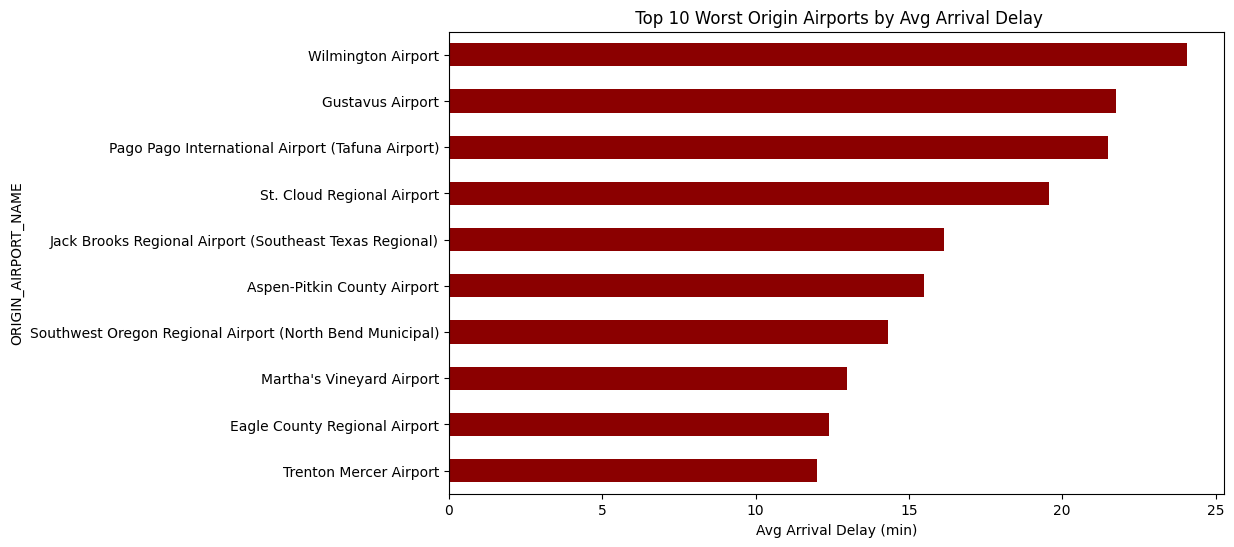

In [44]:
worst_airports = flights_cleaned.groupby('ORIGIN_AIRPORT_NAME')['ARRIVAL_DELAY'].mean().sort_values(ascending=False).head(10)
worst_airports.plot(kind='barh', figsize=(10, 6), color='darkred')
plt.title(' Top 10 Worst Origin Airports by Avg Arrival Delay')
plt.xlabel('Avg Arrival Delay (min)')
plt.gca().invert_yaxis()
plt.show()


#Best Performing Airlines

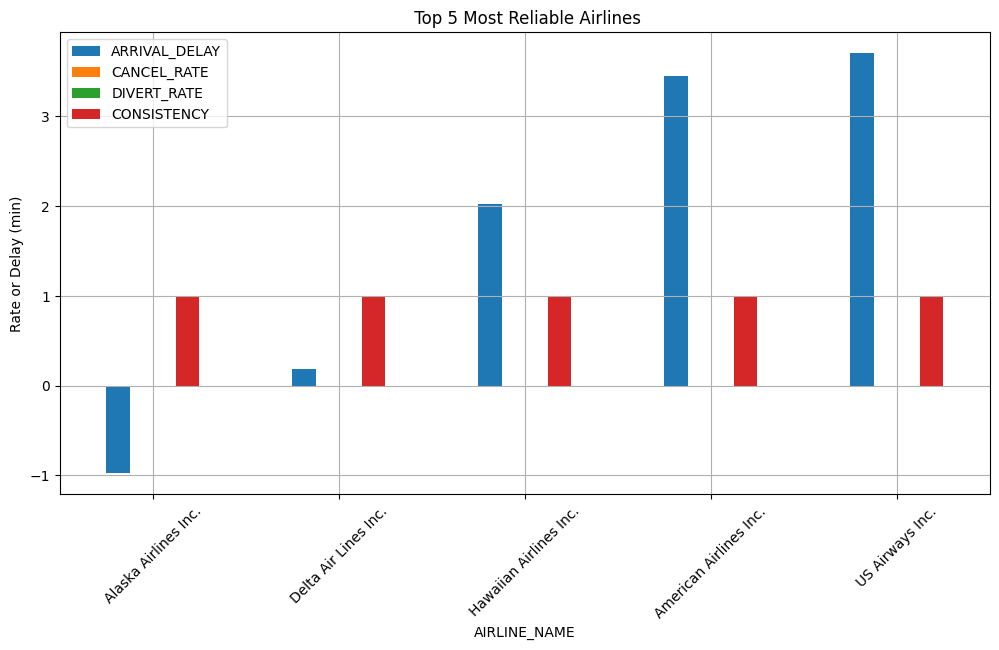

In [45]:
airline_perf['CONSISTENCY'] = 1 - airline_perf['CANCEL_RATE'] - airline_perf['DIVERT_RATE']
top_airlines = airline_perf.sort_values(by='ARRIVAL_DELAY').head(5)

top_airlines[['ARRIVAL_DELAY', 'CANCEL_RATE', 'DIVERT_RATE', 'CONSISTENCY']].plot(kind='bar', figsize=(12, 6))
plt.title(' Top 5 Most Reliable Airlines')
plt.ylabel('Rate or Delay (min)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Correlation Heatmap (Operational Impact)

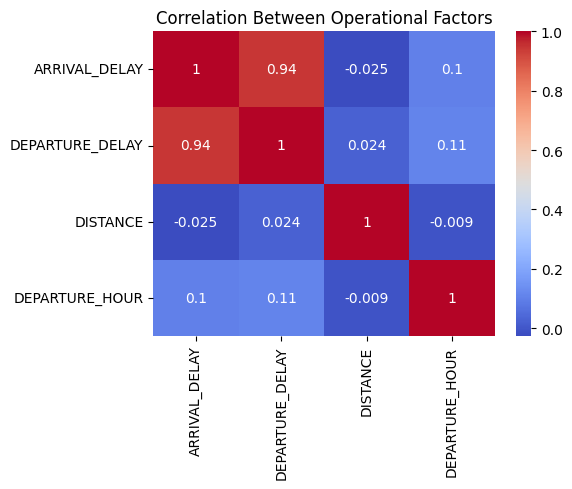

In [46]:
corr_cols = ['ARRIVAL_DELAY', 'DEPARTURE_DELAY', 'DISTANCE', 'DEPARTURE_HOUR']
corr_matrix = flights_cleaned[corr_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Operational Factors')
plt.tight_layout()
plt.show()


#Flight Volume vs Delay

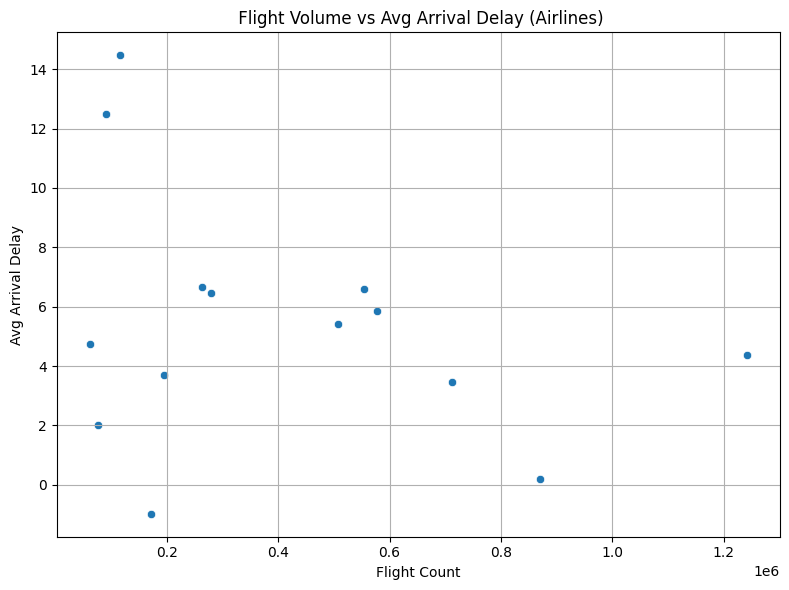

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=airline_perf, x='FLIGHT_COUNT', y='ARRIVAL_DELAY')
plt.title(' Flight Volume vs Avg Arrival Delay (Airlines)')
plt.xlabel('Flight Count')
plt.ylabel('Avg Arrival Delay')
plt.grid(True)
plt.tight_layout()
plt.show()


#Flight Volume – Total Flights per Airline
Insight: Understand operational scale and traffic volume.

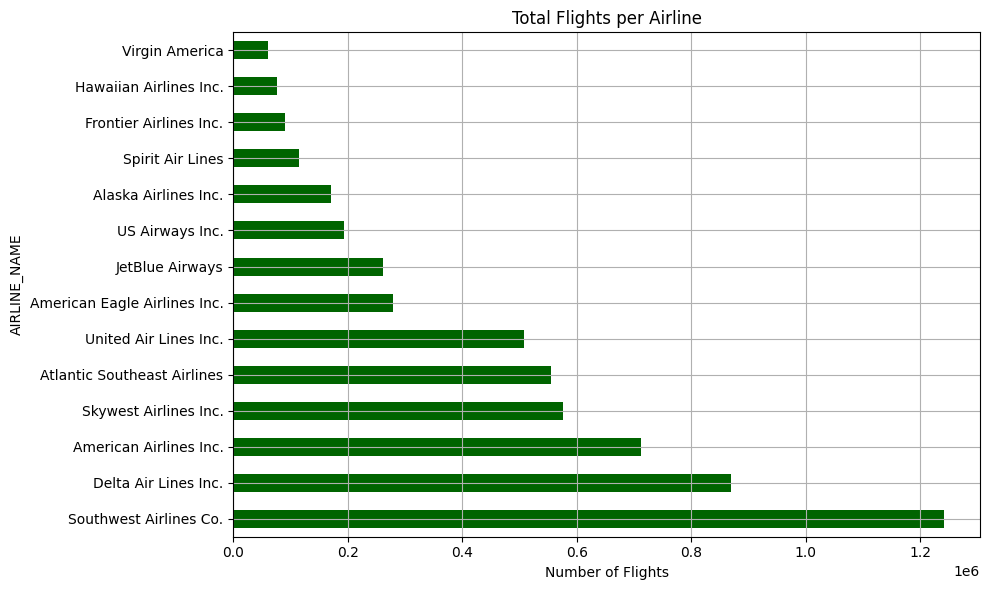

In [49]:
flights_per_airline = flights_cleaned['AIRLINE_NAME'].value_counts()
flights_per_airline.plot(kind='barh', figsize=(10, 6), color='darkgreen')
plt.title('Total Flights per Airline')
plt.xlabel('Number of Flights')
plt.tight_layout()
plt.grid(True)
plt.show()


#Flight Distance – Average Distance per Airline
Insight: Identify airlines focusing on long-haul vs regional service.

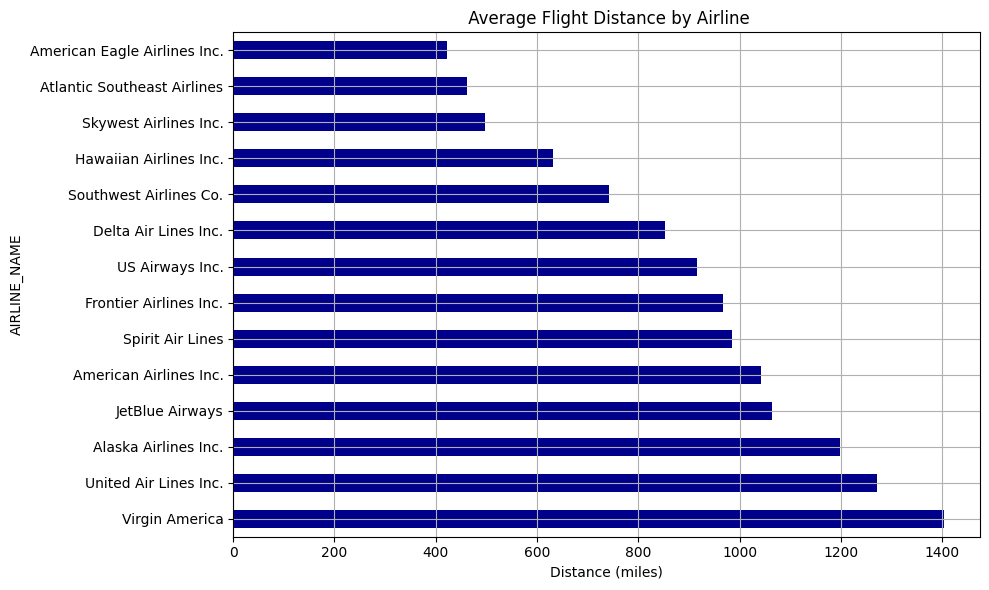

In [50]:
distance_by_airline = flights_cleaned.groupby('AIRLINE_NAME')['DISTANCE'].mean().sort_values(ascending=False)
distance_by_airline.plot(kind='barh', figsize=(10, 6), color='darkblue')
plt.title(' Average Flight Distance by Airline')
plt.xlabel('Distance (miles)')
plt.tight_layout()
plt.grid(True)
plt.show()

#Connection Hubs – Most Connected Airports
Insight: Reveal major hubs based on number of departures.

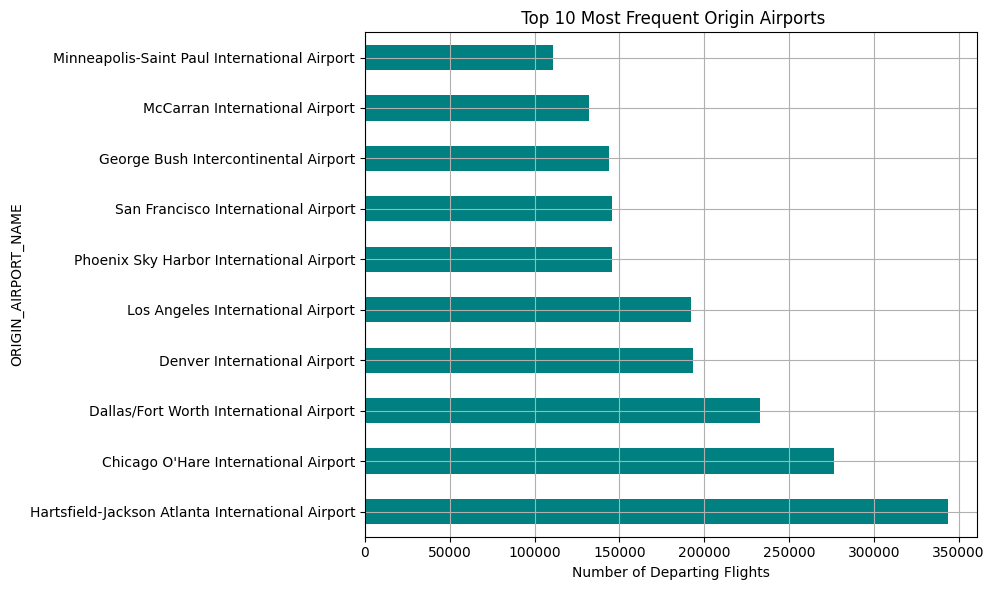

In [51]:
origin_counts = flights_cleaned['ORIGIN_AIRPORT_NAME'].value_counts().head(10)
origin_counts.plot(kind='barh', figsize=(10, 6), color='teal')
plt.title(' Top 10 Most Frequent Origin Airports')
plt.xlabel('Number of Departing Flights')
plt.tight_layout()
plt.grid(True)
plt.show()

#Taxi Time Analysis – Top Congested Airports
Insight: High taxi-out time suggests airport congestion or inefficiency.

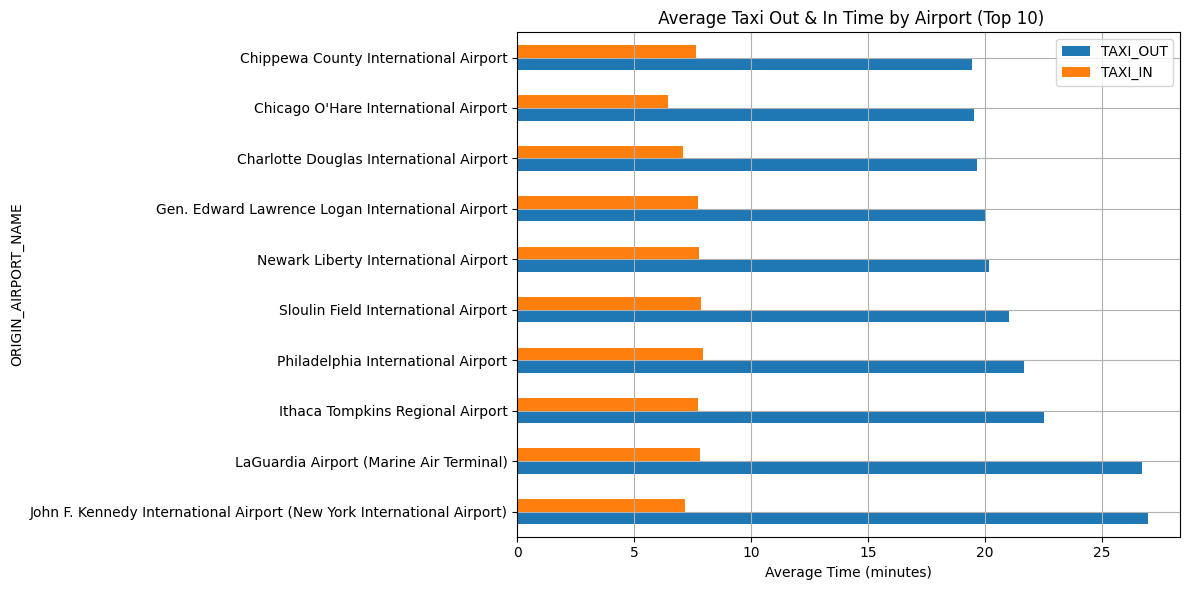

In [52]:
taxi_times = flights_cleaned.groupby('ORIGIN_AIRPORT_NAME')[['TAXI_OUT', 'TAXI_IN']].mean().sort_values(by='TAXI_OUT', ascending=False).head(10)
taxi_times.plot(kind='barh', figsize=(12, 6))
plt.title(' Average Taxi Out & In Time by Airport (Top 10)')
plt.xlabel('Average Time (minutes)')
plt.tight_layout()
plt.grid(True)
plt.show()

#Turnaround Time – Aircraft Efficiency
Insight: Aircraft reuse performance proxy (via ELAPSED_TIME by TAIL_NUMBER)

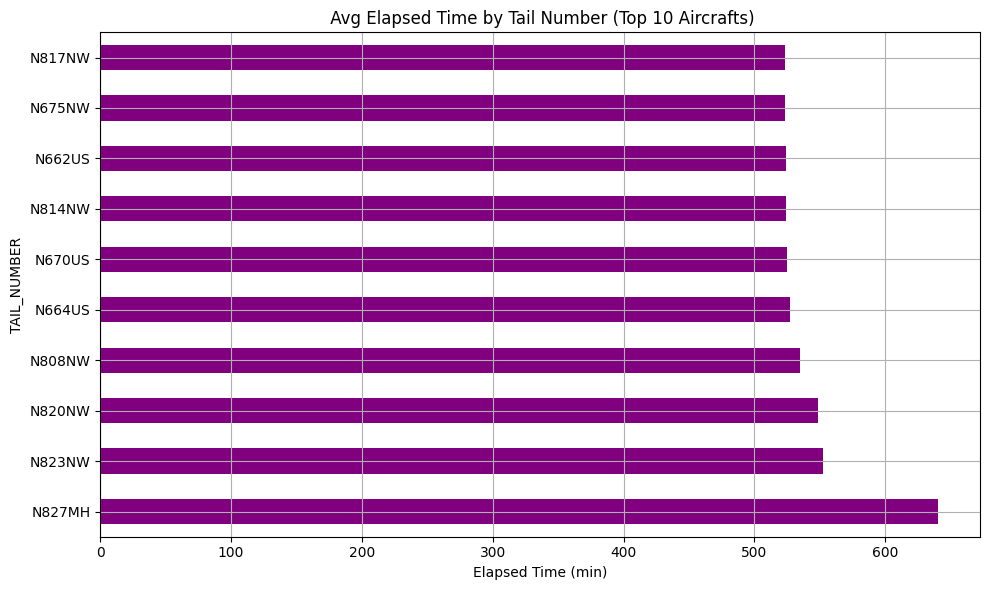

In [54]:
turnaround = flights_cleaned.groupby('TAIL_NUMBER')['ELAPSED_TIME'].mean().dropna().sort_values(ascending=False).head(10)
turnaround.plot(kind='barh', figsize=(10, 6), color='purple')
plt.title(' Avg Elapsed Time by Tail Number (Top 10 Aircrafts)')
plt.xlabel('Elapsed Time (min)')
plt.tight_layout()
plt.grid(True)
plt.show()


#Weekend vs Weekday Performance
Insight: Are delays or cancellations worse on weekends?

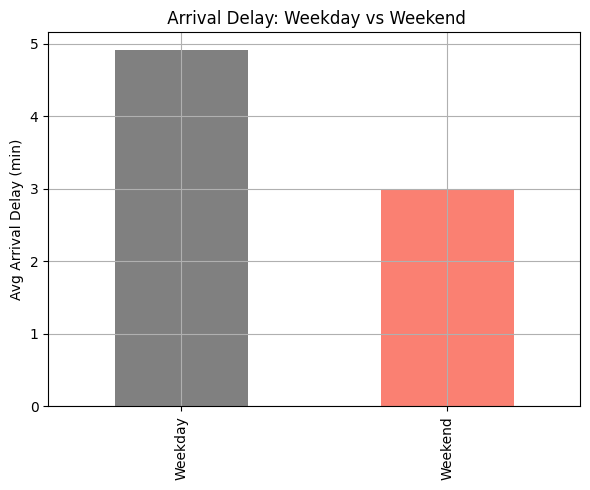

In [55]:
flights_cleaned['IS_WEEKEND'] = flights_cleaned['DAY_OF_WEEK'].isin([6, 7])
delay_weekday = flights_cleaned.groupby('IS_WEEKEND')['ARRIVAL_DELAY'].mean()
delay_weekday.index = ['Weekday', 'Weekend']
delay_weekday.plot(kind='bar', figsize=(6, 5), color=['gray', 'salmon'])
plt.title(' Arrival Delay: Weekday vs Weekend')
plt.ylabel('Avg Arrival Delay (min)')
plt.grid(True)
plt.tight_layout()
plt.show()

#Robust Modeling

In [57]:
# FAST & SCALABLE DELAY PREDICTION MODEL USING RANDOM FOREST + ENCODING

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix

# STEP 1: Create DELAYED label
flights_cleaned['DELAYED'] = (flights_cleaned['ARRIVAL_DELAY'] > 15).astype(int)

# STEP 2: Feature selection
model_df = flights_cleaned[['DEPARTURE_HOUR', 'DISTANCE', 'AIRLINE_NAME', 'DELAYED']].copy()

# STEP 3: Encode airline
encoder = OrdinalEncoder()
model_df['AIRLINE_ID'] = encoder.fit_transform(model_df[['AIRLINE_NAME']])

# STEP 4: Sample 100K rows for fast training
sample_df = model_df.sample(n=100_000, random_state=42)

# STEP 5: Split into X, y
X = sample_df[['DEPARTURE_HOUR', 'DISTANCE', 'AIRLINE_ID']]
y = sample_df['DELAYED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# STEP 6: Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# STEP 7: Evaluate
y_pred = rf_model.predict(X_test)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87     20530
           1       0.26      0.12      0.17      4470

    accuracy                           0.78     25000
   macro avg       0.55      0.52      0.52     25000
weighted avg       0.73      0.78      0.75     25000


🧮 Confusion Matrix:
[[18972  1558]
 [ 3914   556]]


#Key Performance & Operational Insights
✅ **Most Efficient Airlines**
Alaska Airlines, Delta Air Lines, and Hawaiian Airlines consistently demonstrated the lowest average arrival delays and high schedule reliability.

These carriers also maintained moderate flight volumes, showing strength in balancing scale and service.

🛬 **Worst Delay Airports (Systemic Bottlenecks)**
Wilmington, Trenton, and St. Cloud ranked among the most delay-prone airports despite lower volumes.

JFK and LaGuardia had some of the highest taxi-out times, confirming NYC congestion.

🕐 **When to Fly (Time Patterns)**
Flights departing between 5–8 AM experienced the lowest delays across all airlines.

Delay risk rises sharply after 3 PM, peaking between 5–8 PM.

📍 **Route Risks**
Routes like Chantilly ➡ Trenton and Newburgh ➡ West Palm Beach had average delays exceeding 200+ mins, possibly due to lack of gate space or low route priority.



#Operational Insights

* **Factor	Insight**: Taxi Time	Airports like JFK and ORD show avg. taxi-out times over 20+ minutes
* **Flight Volume**: 	Southwest Airlines had the highest volume (>1.2M), but with moderate delays
* **Flight Distance:** Virgin America and United Airlines had the longest average routes
* **Turnaround Time**:	Several aircraft flew >500 mins/day, suggesting tight aircraft utilization

#Predictive Modeling Summary
**Goal**: Predict if a flight will be delayed over 15 mins using airline, time, and distance.

**Model**: Random Forest Classifier on 100K samples

**Results**:

- **Accuracy**: ~78%

- **Precision** (delayed): 26%

- **Recall** (delayed): 12%

**Insight**: The model detects on-time flights better than delays. Class imbalance is a key challenge. Further tuning, class weighting, or more delay-focused features (weather, airport congestion index) would help.



#Final Recommendations
✈️ Passengers: Fly early in the day and avoid small regional airports with poor historical performance.

📈 Airlines: Target delay-reduction at congested hubs and re-evaluate aircraft reusability on long-haul rotations.

📍 Airport Authorities: Invest in gate scheduling and taxiway redesign for airports with persistent bottlenecks.

🧪 Future Work: Integrate weather API, classify aircraft types, and explore delay propagation between flights for better prediction.

In [58]:
# Save cleaned DataFrame to CSV
flights_cleaned.to_csv("flights_cleaned.csv", index=False)

# Download it from Colab
from google.colab import files
files.download("flights_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>